In [48]:
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import date,timedelta
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import seaborn as sns

In [49]:
today = date.today()

d1= today.strftime('%Y-%m-%d')
end_date = d1 
d2 = date.today() - timedelta(days=730)
d2 = d2.strftime('%Y-%m-%d')
start_date = d2 

In [50]:
data = yf.download ('TATAMOTORS.NS', start = start_date, end = end_date, progress=False)

In [51]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-08,314.799988,314.799988,305.000000,306.350006,306.350006,87360324
2021-07-09,305.799988,308.850006,301.850006,306.299988,306.299988,48807214
2021-07-12,310.799988,312.000000,306.100006,307.450012,307.450012,32282319
2021-07-13,310.000000,312.250000,308.149994,310.950012,310.950012,25736308
2021-07-14,310.000000,313.299988,308.649994,309.549988,309.549988,21863250


In [52]:
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

In [53]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-08,314.799988,314.799988,305.000000,306.350006,306.350006,87360324
1,2021-07-09,305.799988,308.850006,301.850006,306.299988,306.299988,48807214
2,2021-07-12,310.799988,312.000000,306.100006,307.450012,307.450012,32282319
3,2021-07-13,310.000000,312.250000,308.149994,310.950012,310.950012,25736308
4,2021-07-14,310.000000,313.299988,308.649994,309.549988,309.549988,21863250


In [54]:
figure = go.Figure(data=[go.Candlestick(x=data['Date'], open=data['Open'], high=data['High'], low=data['Low'], close=data['Close'])])
title = 'CandleStick of stock market'
figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

In [55]:
fig = px.line(data_frame = data, x='Date', y='Close', title='Line plot stock market')
title = 'CandleStick of stock market'
figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [56]:
data['M10'] = data['Close'].rolling(window=10).mean()
data['M20'] = data['Close'].rolling(window=20).mean()

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_13796/2431911399.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_13796/2431911399.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



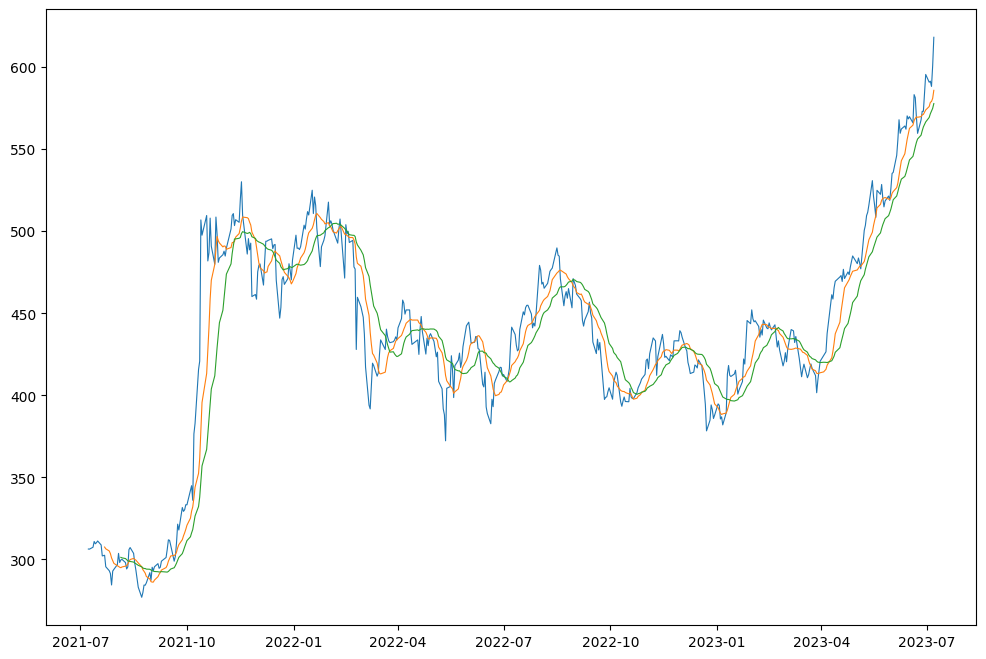

In [57]:
plt.figure(figsize=(12,8))
plt.plot(data['Date'], data['Close'], label='Stock Price', linewidth=0.8)

plt.plot(data['Date'], data['M10'], label='M10', linewidth=0.8)
plt.plot(data['Date'], data['M20'], label='M20', linewidth=0.8)
plt.show()

In [58]:
forecast_data = data.rename(columns={'Date':'ds', 'Close':'y'})

In [59]:
forecast_data.head()

,ds,Open,High,Low,y,Adj Close,Volume,M10,M20
0,2021-07-08,314.799988,314.799988,305.000000,306.350006,306.350006,87360324,NaN,NaN
1,2021-07-09,305.799988,308.850006,301.850006,306.299988,306.299988,48807214,NaN,NaN
2,2021-07-12,310.799988,312.000000,306.100006,307.450012,307.450012,32282319,NaN,NaN
3,2021-07-13,310.000000,312.250000,308.149994,310.950012,310.950012,25736308,NaN,NaN
4,2021-07-14,310.000000,313.299988,308.649994,309.549988,309.549988,21863250,NaN,NaN


In [61]:
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=30)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

15:19:24 - cmdstanpy - INFO - Chain [1] start processing
15:19:24 - cmdstanpy - INFO - Chain [1] done processing
